# Project 1: First steps in Machine Learning (70 Points)
In this project, you will train and evaluate your first machine learning models. We provide a structure with a lot of **TODO**s guiding you through the work. Please read the following information carefully.

## Grading
You can gain a total of 70 points in this project.

Please follow the **TODO**s in this notebook. There are practical and theoretical tasks to do.<br>
When working on the tasks please consider the following information:
* write short texts in **full sentences** answering the TODOs. Note, that analyzing the theoratical parts of the project give roughly 2/3 of all points (at least in part 1)
* when describing classifiers explain at least the training, testing, and the hyper-parameters
* have a look at all imports in this notebook; they already define which method you should use


## Organizational and Deadline
On Monday, **November 13th**, there will be a Q&A session in the tutorials! Start to work on this project **from now on** and take the offer to resolve any remaining ambiguity.
This assignment is due on **November 21st**. Please upload your solution to the Lernraum+ as an ipynb-file.<br>
For a submission you need to be part of a assignment group.

# Part 1: Training your first models (45 points)

In [1]:
import numpy as np
# load dataset_1.npz
# the data and labels are saved in X and y, respectively
data_set = np.load('dataset_1.npz')
X = data_set['X']
y = data_set['y']


### The first dataset

In [2]:
# TODO: take a closer look at the dataset, e.g. number of samples, dimensionality, labels, etc.
np.set_printoptions(threshold=3)

print(X)
print("\n",y)

[[ -2.90736588 -10.4482336 ]
 [  4.18121386  -3.32887987]
 [  9.70396533  -8.0533609 ]
 ...
 [ -6.57325233  -5.42912803]
 [  9.66376838   9.74861342]
 [ 11.26883707  -0.29310154]]

 [0 1 0 ... 0 0 0]


This is a preview of the first and last three rows of our dataset, we investigate more on the range of values taken

In [3]:
X_y0 = X[y == 0]
X_y1 = X[y == 1]

# max and min for y=0
max_X0_y0 = np.max(X_y0[:, 0])
min_X0_y0 = np.min(X_y0[:, 0])
max_X1_y0 = np.max(X_y0[:, 1])
min_X1_y0 = np.min(X_y0[:, 1])

# max and min for y=1
max_X0_y1 = np.max(X_y1[:, 0])
min_X0_y1 = np.min(X_y1[:, 0])
max_X1_y1 = np.max(X_y1[:, 1])
min_X1_y1 = np.min(X_y1[:, 1])

print("For y=0:")
print("Max X[0]:", max_X0_y0)
print("Min X[0]:", min_X0_y0)
print("Max X[1]:", max_X1_y0)
print("Min X[1]:", min_X1_y0)

print("\nFor y=1:")
print("Max X[0]:", max_X0_y1)
print("Min X[0]:", min_X0_y1)
print("Max X[1]:", max_X1_y1)
print("Min X[1]:", min_X1_y1)


For y=0:
Max X[0]: 14.514260440923314
Min X[0]: -10.868933305964145
Max X[1]: 16.207237112413846
Min X[1]: -13.212260715313636

For y=1:
Max X[0]: 9.245757522438286
Min X[0]: -10.719256377408605
Max X[1]: 9.95330159476255
Min X[1]: -11.23989637219021


In [4]:
# Number of samples
num_samples = X.shape[0]
print(f"Number of samples: {num_samples}")

# Dimensionality of the data
dim = X.shape[1]
print(f"Dimensionality of the data: {dim}")

# Unique labels in the dataset
unique_labels = np.unique(y)
num_labels = len(unique_labels)
print(f"There are {num_labels} unique labels in the dataset: {unique_labels}")

# Count of each label (bincount counts the number of occurrencies for each value in an array)
label_counts = np.bincount(y)
# Print the count of each label (enumerate returns a tuple with the index and the value of the array)))
for label, count in enumerate(label_counts):
    print(f"Count of label {label}: {count}")

Number of samples: 800
Dimensionality of the data: 2
There are 2 unique labels in the dataset: [0 1]
Count of label 0: 400
Count of label 1: 400


We are dealing with a dataset of $800$ samples. The independent variables are $X_1$ and $X_2$ which are variables that take values for $y=0$ $$[-10.87, 14.51] \times [-13.21, 16.21]$$ while for $y=1$ we have $$[-10.72,9.24]\times[-11.24,9.95]$$. The dependent variable is $y$ that only takes values in $\{0,\;1\}$, we have half samples labelled with $0$ and the other half labelled with $1$.

In [5]:
num_nan_x0 = np.isnan(X[0]).sum()
num_nan_x1 = np.isnan(X[1]).sum()
num_nan_y = np.isnan(y).sum()

print(f"The number of NaNs in the dataset is {num_nan_x0} for X1, {num_nan_x1} for X2, {num_nan_y} for y")

The number of NaNs in the dataset is 0 for X1, 0 for X2, 0 for y


We have no NaNs in the dataset.

### Splitting the data

For Part 1 of the exercise, use this data split:

In [6]:
n_train = int(0.7*X.shape[0])
n_test_val = int(0.15*X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:n_train+n_test_val]
y_test = y[n_train:n_train+n_test_val]
X_val = X[n_train+n_test_val:]
y_val = y[n_train+n_test_val:]

## 1a) kNN - Classifier

### the Model

**TODO:** Describe the kNN classifier

kNN classifier is a non-parametric method. 

Given the dataset $\mathcal{D}=\{(\vec{x}_i,y_i)\in\mathbb{R}^D\times\{1,\;.\;.\;.,\;C)\}$, for a fixed $k\in\mathbb{N}_{>0}$, the idea of kNN is to estimate $\mathbb{P}(y=j|X=x_0)$ by creating a set of points close to $x_0$ to classifie the test observation $x_0$ to the class with the largest probability.

The accuracy of the classifier is defined as the percentage of ppoints which are classified correctly, i.e. $$accuracy(f,\mathcal{D})=\frac{|\{\vec{x}_i|(\vec{X}_i,y_i)\in\mathcal{D},f(\vec{x]_i)=y_i})|}{|\mathcal{D}|}$$

where for $\mathcal{D}$ we can use the training set/ test set/ validation set.

We have to remind that kNN is a non parametric method, so we are not trying to study any coefficients through this method, but we are only focusing on assigning a probability to the fact that a new sample belongs to a specific class by estimating the conditional distribuition and classifying new samples to the class (in this case $0$ and $1$) with the highest estimated probability.

In [7]:
# TODO: Train and evaluate a kNN classifier with k=3 and report the accuracy of the model on the train, validation and test set.
#       Use the data as splitted above.

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# predictions on the training set
y_train_pred = knn.predict(X_train)

# predictions on the validation set
y_val_pred = knn.predict(X_val)

# predictions on the test set
y_test_pred = knn.predict(X_test)

# training accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_accuracy*100:.2f}%")

# validation accuracies
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy*100:.2f}%")

# test accuracies
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


C:\Users\Annali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Train accuracy: 96.43%
Validation accuracy: 91.67%
Test accuracy: 92.50%


**TODO:** Report your results.

The accuracy is very high for every set of samples, syntom that the model predicts good the dependent variable. As we expected the accuracy of the train set is the higher one, because the model had been trained on that specific part of the dataset.

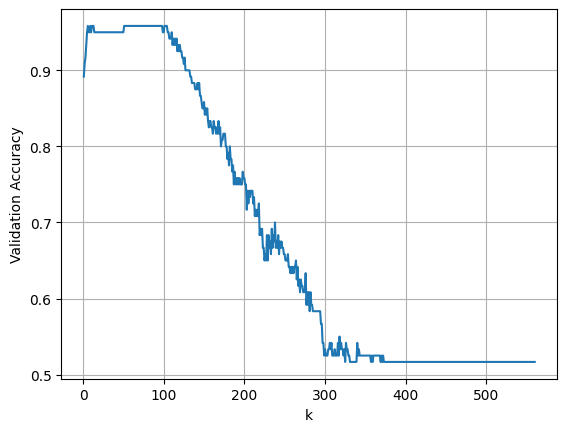

Test accuracy with optimal k = 6: 93.33%


In [8]:
# TODO: Train and test the kNN classifier for different values of k on dataset 1.
#       Use the train set to train the classifier and the validation set to evaluate the performance.
#       Plot the validation accuracy for different values of k. Choose all possible values for k.
#       Finally train the kNN classifier with the optimal k and report the accuracy on the test set.

import matplotlib.pyplot as plt
# list of accuracies
accuracies = []

# trying all k neighbors
for k in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    # predictions on validation set
    y_val_pred = knn.predict(X_val)

    # accuracy on validation set 
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(val_accuracy)

# Plot the validation accuracy for different values of k
plt.plot(range(1, len(accuracies)+1), accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.grid()
plt.show()


# optimal k based on validation acuracy
optimal_k = np.argmax(accuracies) + 1

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# predictions on test set
y_test_pred_optimal = knn_optimal.predict(X_test)

# accuracy on test set
test_accuracy_optimal = accuracy_score(y_test, y_test_pred_optimal)
print(f"Test accuracy with optimal k = {optimal_k}: {test_accuracy_optimal*100:.2f}%")


**TODO:** Answer the following questions in a **full text**.

* Describe your choice of values of k. Why did you choose them?
> 
* For which values of k does the model perform best?
> 
* Would this value perform best on another dataset as well?
> 
* What is the smallest and the greatest possible value for k? What would happen if we would choose these special values?
> 

We plotted the accuracy on the validation set depending on $k$ neighbours taken into account, and since $k$ represents the number of samples, we go from $k=1$ to $k=561$, which is the number of samples belonging to the training set.

As we can see, we reach the optimum for $k=6$ with an accuracy on the test set of $93.33\%$, and we keep a high validation accuracy until about $k = 100$, when it starts decreasing.

Of course we can't say in general that such a $k$ will perform best on another dataset as well, because of a bias-variance trade off, every dataset may de distribuited in a particular way that makes impossibile to say which specific $k$ would fit the best. It depends at most from the distribuition of the samples: if the classes are particulary good distribuited we would need a lower $k$, but if the samples are not specifically distribuited, we would need a higher $k$ (or in the worsted cases no $k$ would fit well).

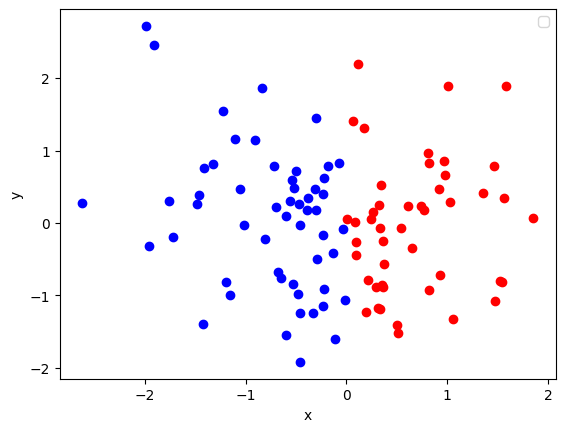

Case in which the dataset presents a good distribuition and even a big $k$ would fit well.

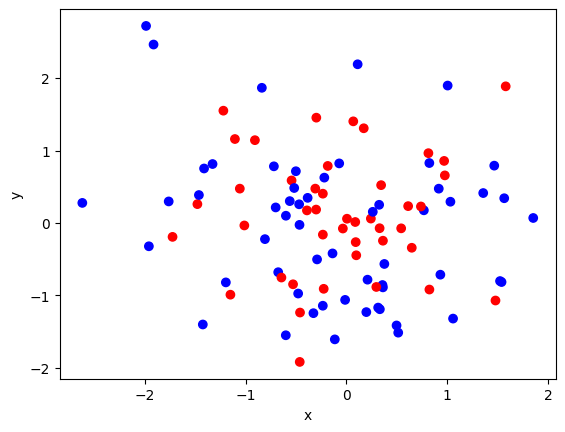

Case in which there's no particular distribuition of the points and finding a specific $k$ would be crucial, because a high $k$ would create an ambiguous neighbourhood.

As we have already seen, we took values for $k$ in the interval $[1,561]$ which means that:

- For $k=1$, we are taking only one sample to perform the accuracy, this means that we have an overly flexible decision boundary, a low bias, but a high variance, because the training error is null, but it's impossible to classify a new sample in such a way;

- For $k=561$, we are using the whole dataset as neighbourhood, which will cause enormous errors in classification.

## 1b) Logistic Regression
Let's try another model as well. We will use the same dataset and split as before.

### the Model

**TODO:** Describe the logistic regression model

Given a two classification problem with classes $0$ and $1$, the logistic regression is a parametric model that realizes the model $$\mathbb{P}(y=1|\vec{x},\vec{w})\sim Be(y=1|sgd(\vec{w}^T\vec{x}))$$ where $\vec{w}$ is the model parameter, $sgd(t)=(1+exp(-t))^{-1}$ is the sigmoidal function and $Be$ is the Bernoulli distribuition.

In [9]:
# TODO: * Train and test logistic regression on the same split of dataset_1.npz (report accuracy for train, test and validation)
#       * Plot the dataset and the decision boundary, own implementation needed (see lecture slide 52 in slides1.pdf)
#         where the decision boundary is optimized on the complete dataset (X).

from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

#accuracy on training set, test set and validation set
train_accuracy = logisticReg.score(X_train, y_train)
test_accuracy = logisticReg.score(X_test, y_test)
val_accuracy = logisticReg.score(X_val, y_val)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')

Train Accuracy: 0.5767857142857142
Test Accuracy: 0.44166666666666665
Validation Accuracy: 0.6166666666666667


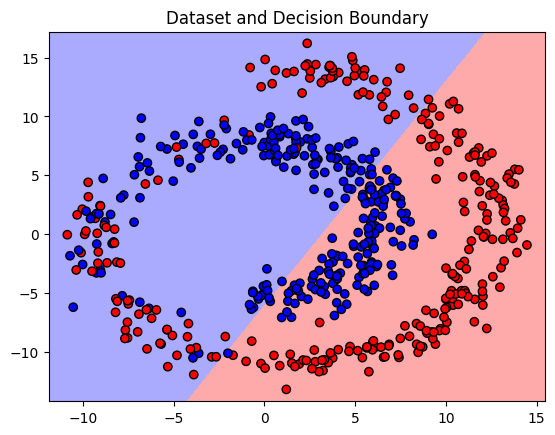

In [10]:
from matplotlib.colors import ListedColormap

def plot_data_and_boundary(X, y, model):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title("Dataset and Decision Boundary")

    plt.show()

plot_data_and_boundary(X_train, y_train, logisticReg)




**TODO:** How does Logistic Regression perform on this dataset? How does this relate to the properties of the model and the dataset? Answer in full sentences.


By performing logistic regression on this dataset we obtained the follow values for the accuracy:

- Train Accuracy: $57,78\%$
- Test Accuracy: $44,17\%$
- Validation Accuracy: $61,67\%$

This values are very low, because they mean that the the portion of samples missclassified is about $\frac{1}{2}$ for training, test and validation sets, which is a very high probability of getting wrong classification results for new samples.

It was already clear from the plot that with a linear boundary the classification was terrible, but with the accuracy's values is even more obvious that the logistic regression has a terrible performance on this dataset.

The problem is the fact that using a linear function as boundary can not divide correctly into the two classes due to the points' distribution into class $0$ and $1$.

Best degree: 3 with a validation accuracy of 95.83%


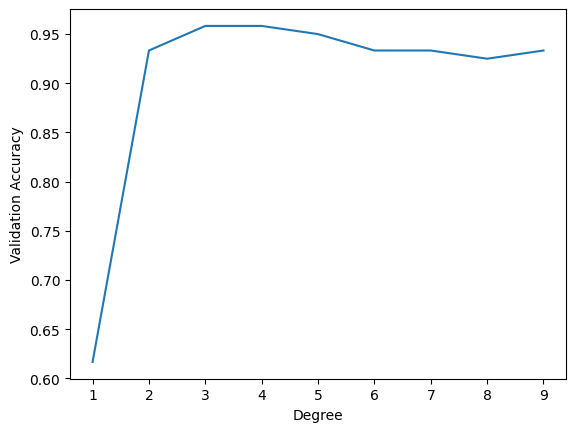

In [11]:
# TODO: To achieve better performance, we apply polynomial preprocessing before fitting logistic regression. Therefor, you may construct a pipeline as shown below.
#       Similar to kNN, optimize the polynomial degree and plot performance for different values. Pass only one degree to PolynomialFeatures (not a tuple (min,max)) at each time
#       and validate the whole pipeline!
#       Remember to use the train set for training and the validation set to determine the optimal polynomial degree.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning

# ignore convergence warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning) 

estimators = [('poly', PolynomialFeatures(degree=1)), ('clf', LogisticRegression(max_iter=10000))]
pipe = Pipeline(estimators)

# degree range
degrees = range(1, 10)

# validation accuracies
val_accuracies = []

for degree in degrees:
    pipe.set_params(poly__degree=degree)
    
    pipe.fit(X_train, y_train)
    
    # predictions on validation set
    y_val_pred = pipe.predict(X_val)
    
    # validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

degree_best = np.argmax(val_accuracies)+1
print(f"Best degree: {degree_best} with a validation accuracy of {val_accuracies[degree_best]*100:.2f}%")


plt.plot(degrees, val_accuracies)
plt.xlabel('Degree')
plt.ylabel('Validation Accuracy')
plt.show()



Test Accuracy: 93.33%


c:\Users\Annali\Desktop\Università\Magistrale\Bielefeld\Introduction to machine learning\Project 1\inx\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


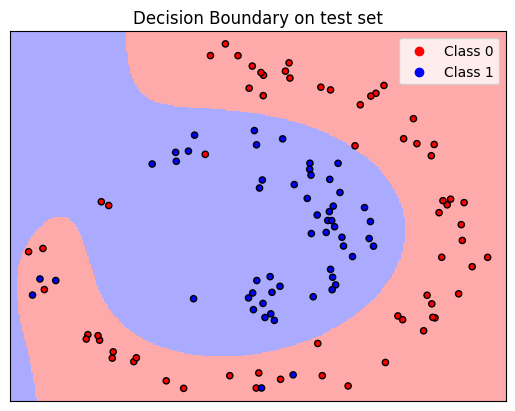

In [12]:
from utils import plot_2d_decisionboundary

# TODO: Given the best polynomial degree, train your model again, report the test accuracy and plot the decision boundary.
#       Here you can use plot_2d_decisionboundary() from utils.py, because plotting the decision boundary with preprocessing is more complicated.
#       Instead of calculating the decision boundary exactly, the function uses a grid-based approach, where each (x,y) position in the plot is colored
#       according to the prediction of the estimator given (x,y).

estimators_2 = [('poly', PolynomialFeatures(degree=degree_best)), ('clf', LogisticRegression(max_iter=100000))]
pipe_2 = Pipeline(estimators_2)
pipe_2.fit(X_train, y_train)
y_test_pred = pipe_2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

plot_2d_decisionboundary(pipe_2, X_test, y_test, title="Decision Boundary on test set")

**TODO:** Report your results. Answer the following questions in full sentences.

* What degrees did you try out and why?  
>

* For what degree does the pipeline perform best?  
> 

* Would this polynomial degree also perform best on another dataset?  
> 

We were asked in this last TODO to apply polynomial preprocessing before fitting logistic regression to achieve better performance, so we needed to find the best polynomial degree for the decision boundary of the logistic regression. As degrees we tried to focus on the natural numbers between $1$ and $10$, because degree zero (line paralel to the x axis) had clearly no sense and taking bigger numbers than $10$ would produce a overly flexible boundaries that would make impossible to classify new samples (as we already explained for KNN for the bias-variance trade off).

We saw that the pipeline performs better in terms of validation accuracy when it reaches the higher value $95,83\%$ for $k=3$. So we decided to use a polynomial of degree $3$.

As we said for KNN, the chosen degree for the boundary in logistic regression won't in general perform best on another dataset as well, because of a bias-variance trade off, every dataset may de distribuited in a particular way that makes impossibile to say which specific polynomial degree would fit the best, it depends at most from the distribuition of the samples.

## 1c) Comparing kNN and Logistic Regression
We want you to compare the kNN and the logistic regression classifier. For logistic regression use logistic regression with and without polynomial preprocessing. Use the previous dataset (dataset 5) and dataset 1.

**TODO:** Compare the performance of the kNN and Logistic Regression classifiers you trained before. You can skip the hyperparameter tuning and use the best k and polynomial degree from before. Therefor, a simple train-test split is sufficient (e.g. 70:30)
- compare the accuracies
- it may be useful to plot the decision boundaries for both classifiers (feel free to use plot_2d_decisionboundary() from the code snippet below)

In [13]:
# TODO: Plot the data and the decision boundary of the classifiers. plot_2d_decisionboundary() in utils.py can be used.
#       Add more code if helpful for the comparison of the classifiers. Use the datasets dataset_1.npz and dataset_2.npz

from utils import plot_classification_dataset
from sklearn.model_selection import train_test_split

def train(dataset):
    """
    Train kNN & Log.Reg. on a given dataset and plot the dataset as well as the
    model's decision boundary
    
    Params:
        dataset: name of the datase
    
    Examples:
        train('dataset_1')
    """
    
    # TODO
    
    # Load the dataset
    data = np.load(f'{dataset}.npz')
    X = data['X']
    y = data['y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train, y_train)

    logreg = LogisticRegression(max_iter=10000)
    logreg.fit(X_train, y_train)

    poly_logreg = Pipeline([('poly', PolynomialFeatures(degree=degree_best)), ('clf', LogisticRegression(max_iter=10000))])
    poly_logreg.fit(X_train, y_train)

    # accuracies on test sets
    print(f'kNN Accuracy on test set  {accuracy_score(y_test, knn.predict(X_test))*100:.2f}%')
    print(f'Logistic Regression with Polynomial Preprocessing Accuracy on test set: {accuracy_score(y_test, poly_logreg.predict(X_test))*100:.2f}%')

    # plot
    plot_2d_decisionboundary(knn, X_train, y_train, title="KNN decision boundary")
    plot_2d_decisionboundary(poly_logreg, X_train, y_train, title="Logistic regression with polynomial preprocessing decision boundary")


kNN Accuracy on test set  92.92%
Logistic Regression with Polynomial Preprocessing Accuracy on test set: 93.33%


c:\Users\Annali\Desktop\Università\Magistrale\Bielefeld\Introduction to machine learning\Project 1\inx\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


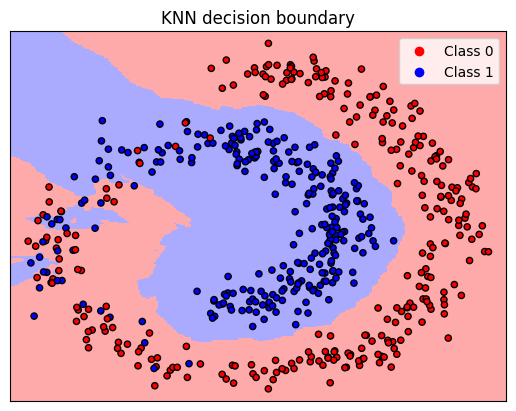

c:\Users\Annali\Desktop\Università\Magistrale\Bielefeld\Introduction to machine learning\Project 1\inx\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


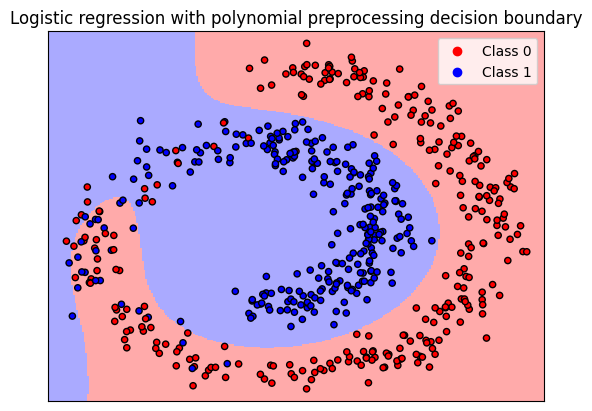

In [14]:
train("dataset_1")

kNN Accuracy on test set  90.83%
Logistic Regression with Polynomial Preprocessing Accuracy on test set: 90.42%


c:\Users\Annali\Desktop\Università\Magistrale\Bielefeld\Introduction to machine learning\Project 1\inx\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


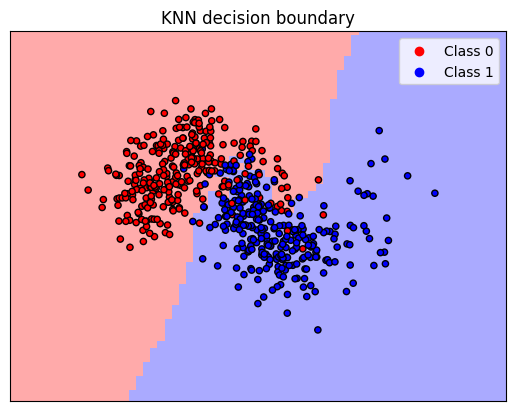

c:\Users\Annali\Desktop\Università\Magistrale\Bielefeld\Introduction to machine learning\Project 1\inx\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


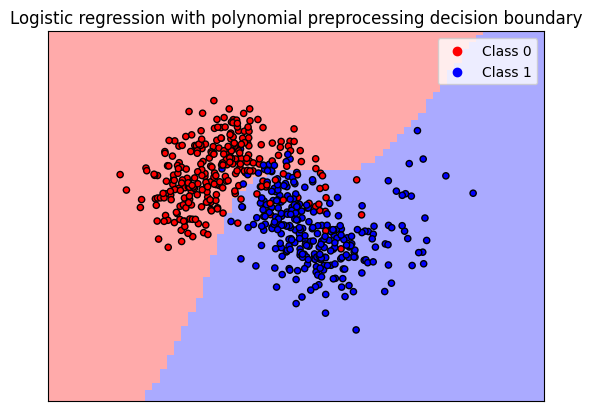

In [15]:
train("dataset_2")

**TODO:** Describe your results and analyze them: Is one model performing better than the other? Is there a difference in the datasets causing this behavior?

**Answer:**

*dataset_1*:  

In this dataset we can see that the boudaries are quite similar, but KNN is less smooth which helps to classify better the points on the left from class $1$, but it looses precision on the classification in this area of the ones of class $0$. This is due to the fact that KNN can describes better the less smooth areas.

|  | KNN | Logistic regression |
|---|:---:|:---:|
|Accuracy on test set | $92.92\%$ | $93.33\%$ |

From the values of the accuracies it is possible to see that logistic regression provides numerically a better classification

*dataset_2*:  

Also in this dataset the boundaries are very similar, but KNN classifies better the points of the class $0$ close to the boundary.

|  | KNN | Logistic regression |
|---|:---:|:---:|
|Accuracy on test set | $90.83\%$ | $90.42\%$ |

From the values of the accuracies it is possible to see that KNN provides numerically a better classification


Both provides by the way a slight difference of almost $0.4\%$

# Part 2: Model evaluation (10 points)

Consider the following scenario: Two groups of students work on this assignment. They both use the function below to generate a train-test split and compare the performance of kNN and Logistic Regression. However both groups achieve different results. The code snippet below shows how they handled the comparison.
Fill the TODOs for training and evaluation of kNN and Logistic Regression with the given hyperparameters.

In [16]:
data_set = np.load('dataset_2.npz')
X = data_set['X']
y = data_set['y']

n = X.shape[0]

def train_knn(X_train, X_test, y_train, y_test):
    # Train a kNN classifier with k=5
    knn_comparison = KNeighborsClassifier(n_neighbors=5)
    knn_comparison.fit(X_train, y_train)

    accuracy_comparison = knn.score(X_test, y_test)
    print(f'kNN Accuracy: {accuracy_comparison*100:.2f}%')

def train_logreg(X_train, X_test, y_train, y_test):
    # Train a logistic regression pipeline with polynomial preprocessing (deg=2)
    pipe_comparison = Pipeline([('poly', PolynomialFeatures(degree=2)), ('clf', LogisticRegression(max_iter=10000))])
    pipe_comparison.fit(X_train, y_train)

    accuracy_comparison = pipe_comparison.score(X_test, y_test)
    print(f'Logistic Regression Accuracy: {accuracy_comparison*100:.2f}%')

    
def group1_eval():
    print("group1:")
    n_train = int(4*n/5)
    X_train = X[:n_train]
    X_test = X[n_train:]
    y_train = y[:n_train]
    y_test = y[n_train:]
    
    train_knn(X_train, X_test, y_train, y_test)
    train_logreg(X_train, X_test, y_train, y_test)
    
    
def group2_eval():
    print("group2")
    n_test = int(n/5)
    X_train = X[n_test:]
    X_test = X[:n_test]
    y_train = y[n_test:]
    y_test = y[:n_test]
    
    train_knn(X_train, X_test, y_train, y_test)
    train_logreg(X_train, X_test, y_train, y_test)
    
group1_eval()
group2_eval()

group1:
kNN Accuracy: 44.38%
Logistic Regression Accuracy: 86.88%
group2
kNN Accuracy: 54.37%
Logistic Regression Accuracy: 93.12%


**TODO:** Explain why they achieve different results. Can you think of any better strategy than the simple train-test split to make the results more comparable? Feel free to add some code to underline your points or show your recommended approach.

* What do you think, whose results are correct?
> 
* How could they improve their evaluation to be more confident about the results? (hint: If we make a statement like classifier 1 outperforms classifier 2 on this dataset, the statement should be representative for the whole dataset. As always, efficient solutions are preferable!)
> 

The two goups of students obtained very different results with the same classification methods, because of the way they split the data into training and testing sets, because the left procedure remained exactly the same.

The first group used the first $80\%$ of the data for training and the last $20\%$ for testing. The other group, on the other hand, uses the first $20\%$ of the data for testing and the last $80\%$ for training. Since we don't know where the data come from we may suspect that they have been ordered in a specific way or that they have been collected in a chronological order, which would impact a lot in a spit of the data set in training and test set, and in fact the results can be seen in the accuracy.

A way to make the results more comparable is to pick randomically the samples from the dataset to divide in training and test set both for the first and second group to be sure that they behave at best in the same way.

We can implement it as follows:

In [17]:
# TODO: Implement your recommended approach.
from sklearn.utils import shuffle

X_s, y_s = shuffle(X, y, random_state=42)
#in this case we have to consider that even random seed would modify the results

def group1_shuffled():
    print("group1 shuffled:")
    n_train = int(4*n/5)
    X_train = X_s[:n_train]
    X_test = X_s[n_train:]
    y_train = y_s[:n_train]
    y_test = y_s[n_train:]
    
    train_knn(X_train, X_test, y_train, y_test)
    train_logreg(X_train, X_test, y_train, y_test)
    
    
def group2_shuffled():
    print("group2 shuffled")
    n_test = int(n/5)
    X_train = X_s[n_test:]
    X_test = X_s[:n_test]
    y_train = y_s[n_test:]
    y_test = y_s[:n_test]
    
    train_knn(X_train, X_test, y_train, y_test)
    train_logreg(X_train, X_test, y_train, y_test)
    
group1_shuffled()
group2_shuffled()

group1 shuffled:
kNN Accuracy: 50.62%
Logistic Regression Accuracy: 91.25%
group2 shuffled
kNN Accuracy: 53.12%
Logistic Regression Accuracy: 91.25%


With this procedure the data are more comparable, but not at best since also <tt>random_state=42</tt> provides slightly different results. Another way to make the data reliable at best is that the two groups joint together (otherwise they would obtain exactly the same results) to use k-fold cross-validation. In k-fold cross-validation, the data is divided into $k$ subsets. The model is then trained $k$ times, each time using $k-1$ subsets for training and the remaining subset for testing. The performance is then averaged over the $k$ iterations.

In [18]:
# TODO: Implement your recommended approach.
from sklearn.model_selection import cross_val_score

def cross_val_knn(X, y):
    knn_cross = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn_cross, X, y, cv=5)
    print(f'kNN Cross-validation Accuracy: {np.mean(scores)*100:.2f}%')

def cross_val_logreg(X, y):
    pipe_cross = Pipeline([('poly', PolynomialFeatures(degree=2)), ('clf', LogisticRegression(max_iter=10000))])
    scores = cross_val_score(pipe_cross, X, y, cv=5)
    print(f'Logistic Regression Cross-validation Accuracy: {np.mean(scores)*100:.2f}%')
cross_val_knn(X, y)
cross_val_logreg(X, y)

kNN Cross-validation Accuracy: 91.62%
Logistic Regression Cross-validation Accuracy: 90.00%


In this way we can see that in reality the used methods are reliable, but they reach high accuracy only through k-fold cross-validation.

# Part 3: Yet another Dataset (15 points)

In [19]:
# TODO: * Load dataset_3.npz (data is stored again in X and in y)
#       * Train and report the accuracy for the kNN and the logistic regression classifier. Use logistic regression without polynomial preprocessing.
#       * You may use a simple train-test split or your proposed strategy from part 2.

data_set = np.load('dataset_3.npz')
X = data_set['X']
y = data_set['y']

X_train, X_testt, y_train, y_testt = train_test_split(X, y, test_size=0.3, random_state=42)
#from now on testt will refer to the test set, we split it into halves to obtain the validation set
X_test, X_val, y_test, y_val = train_test_split(X_testt, y_testt, test_size=0.5, random_state=42)

accuracies = []

# looking for the best k to use knn on
for k in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    # predictions on validation set
    y_val_pred = knn.predict(X_val)

    # accuracy on validation set 
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(val_accuracy)


# optimal k based on validation acuracy
optimal_k = np.argmax(accuracies) + 1

# Train a kNN classifier with the optimal k
knn_3 = KNeighborsClassifier(n_neighbors=optimal_k)
knn_3.fit(X_train, y_train)

# Train a Logistic Regression classifier
logreg_3 = LogisticRegression(max_iter=10000)
logreg_3.fit(X_train, y_train)

knn_accuracy_train = knn_3.score(X_train, y_train)
logreg_accuracy_train = logreg_3.score(X_train, y_train)
knn_accuracy_test = knn_3.score(X_testt, y_testt)
logreg_accuracy_test = logreg_3.score(X_testt, y_testt)

print(f'kNN Accuracy on training set: {knn_accuracy_train*100:.2f}%')
print(f'Logistic Regression Accuracy on training set: {logreg_accuracy_train*100:.2f}%')
print(f'kNN Accuracy on test set: {knn_accuracy_test*100:.2f}%')
print(f'Logistic Regression Accuracy on test set: {logreg_accuracy_test*100:.2f}%')


kNN Accuracy on training set: 98.57%
Logistic Regression Accuracy on training set: 88.86%
kNN Accuracy on test set: 98.33%
Logistic Regression Accuracy on test set: 87.33%


In [20]:
# TODO: Report the accuracy for each class. To report the accuracy for class i, compute the accuracy score only on samples that belong to class i.

# Get the unique classes in the target variable
classes = np.unique(y)

# For each class
for i in classes:
    # Create a mask for the current class
    mask1 = y_testt == i
    mask2 = y_train == i
    # Calculate the accuracy for the current class
    knn_accuracy_test = accuracy_score(y_testt[mask1], knn_3.predict(X_testt[mask1]))
    logreg_accuracy_test = accuracy_score(y_testt[mask1], logreg_3.predict(X_testt[mask1]))
    knn_accuracy_train = accuracy_score(y_train[mask2], knn_3.predict(X_train[mask2]))
    logreg_accuracy_train = accuracy_score(y_train[mask2], logreg_3.predict(X_train[mask2]))

    # Print the accuracy for the current class
    print(f'Class {i} - kNN Accuracy on training set: {knn_accuracy_train*100:.2f}%')
    print(f'Class {i} - Logistic Regression Accuracy on training set: {logreg_accuracy_train*100:.2f}%')
    print(f'Class {i} - kNN Accuracy on test set: {knn_accuracy_test*100:.2f}%')
    print(f'Class {i} - Logistic Regression Accuracy on test set: {logreg_accuracy_test*100:.2f}%')



Class 0 - kNN Accuracy on training set: 94.29%
Class 0 - Logistic Regression Accuracy on training set: 46.67%
Class 0 - kNN Accuracy on test set: 93.33%
Class 0 - Logistic Regression Accuracy on test set: 44.44%
Class 1 - kNN Accuracy on training set: 99.33%
Class 1 - Logistic Regression Accuracy on training set: 96.30%
Class 1 - kNN Accuracy on test set: 99.22%
Class 1 - Logistic Regression Accuracy on test set: 94.90%


**TODO:** Describe your results and analyze them: Do you observe any problematic behavior?
> 

As we can see from the accuracy obtained through KNN (both for training set and test set), the samples are classified very well for the optimal $k=5$, because we obtained values greater that $90\%$ for both of all accuracies.

On the other hand, we can not rely on Logistic regression (both for training set and test set) since even if we got a high accuracy for the classification of class $1$, less than a half of the observations are classified correctly in class $0$.

Now we start investigating on the reason why the accuracy is so low for logistic regression.

In [21]:
# TODO: analyze the dataset; focus on possible reasons for above mentioned problems.
#       You might consider plotting the data.

# Number of samples
num_samples = X.shape[0]
print(f"Number of samples: {num_samples}")

Number of samples: 1000


We have one thousand samples, so the reason may not be the fact that we have trained a model with not so many samples.

In [22]:
# Unique labels in the dataset
unique_labels = np.unique(y)
num_labels = len(unique_labels)
print(f"There are {num_labels} unique labels in the dataset: {unique_labels}")

There are 2 unique labels in the dataset: [0 1]


We have two labels in this dataset, let's study more how they are divided.

In [23]:
# Count of each label (bincount counts the number of occurrencies for each value in an array)
label_counts = np.bincount(y)
# Print the count of each label (enumerate returns a tuple with the index and the value of the array)))
for label, count in enumerate(label_counts):
    print(f"Count of label {label}: {count}")

Count of label 0: 150
Count of label 1: 850


From this output is clear that the data of samples belong more to the class $1$ which would explain why ther's a higher chance of classifing them correctly, but this doesn't explain why KNN performs better than logistic regression. We also plot the data to see it even more clearly:

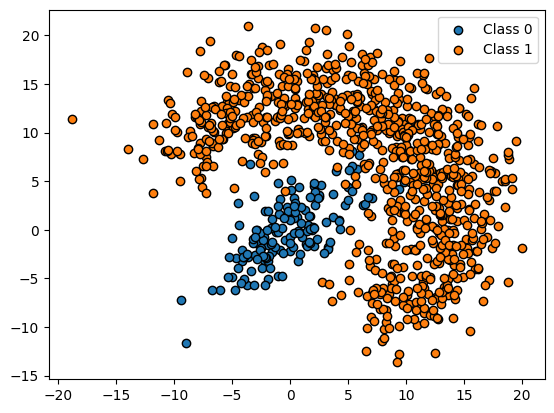

In [24]:
plt.scatter(X[y==0, 0], X[y==0, 1],edgecolor='k', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1],edgecolor='k', label='Class 1')

plt.legend()
plt.show()

**TODO:** Discuss the properties of the dataset and how they influence the performance of the classifiers.

> 

In [25]:
# Values where y is 0
X_y0 = X[y == 0]

# Values where y is 1
X_y1 = X[y == 1]

# Find the maximum and minimum for X[0] and X[1] where y is 0
max_X0_y0 = np.max(X_y0[:, 0])
min_X0_y0 = np.min(X_y0[:, 0])
max_X1_y0 = np.max(X_y0[:, 1])
min_X1_y0 = np.min(X_y0[:, 1])

# Find the maximum and minimum for X[0] and X[1] where y is 1
max_X0_y1 = np.max(X_y1[:, 0])
min_X0_y1 = np.min(X_y1[:, 0])
max_X1_y1 = np.max(X_y1[:, 1])
min_X1_y1 = np.min(X_y1[:, 1])

# Print the results
print("For y=0:")
print("Max X[0]:", max_X0_y0)
print("Min X[0]:", min_X0_y0)
print("Max X[1]:", max_X1_y0)
print("Min X[1]:", min_X1_y0)

print("\nFor y=1:")
print("Max X[0]:", max_X0_y1)
print("Min X[0]:", min_X0_y1)
print("Max X[1]:", max_X1_y1)
print("Min X[1]:", min_X1_y1)


For y=0:
Max X[0]: 9.84086573373473
Min X[0]: -9.425676940715634
Max X[1]: 8.121528145167192
Min X[1]: -11.671808485639403

For y=1:
Max X[0]: 20.05382526651684
Min X[0]: -18.855849116657105
Max X[1]: 20.922041305439514
Min X[1]: -13.646549397587561


As we can see the samples from class $0$ are contained in the box $[-9.43,9.84]\times [-11.67,8.12]$ and the samples from class $1$ are contained in the box $[-18.85,20.05]\times [-13.65,20.92]$. From the plot is even more clear that if we consider a decision boundary of degree $1$ it's easy to understand that in such a plot it would perform very badly in classify samples from class 0. On the other hand considering KNN classifiers, for $k=5$, we would create a less linear boundary that may classify better the samples of such a dataset. 

Let's also plot it to see it more clearly:

c:\Users\Annali\Desktop\Università\Magistrale\Bielefeld\Introduction to machine learning\Project 1\inx\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


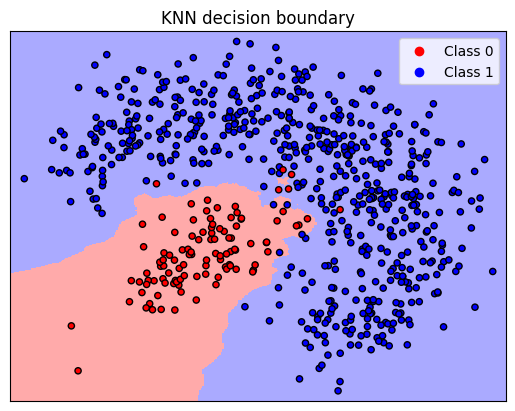

c:\Users\Annali\Desktop\Università\Magistrale\Bielefeld\Introduction to machine learning\Project 1\inx\utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda i: color_data['colors'][i], y)), cmap=cmap_bold, edgecolor='k', s=20)


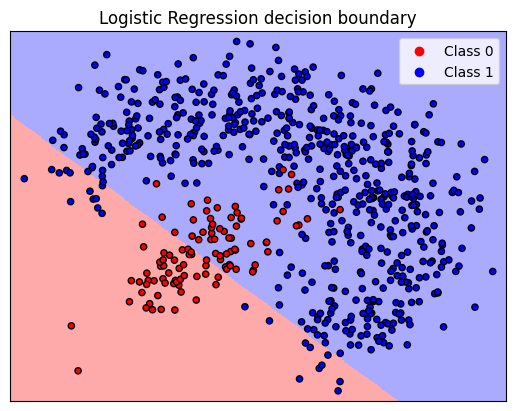

In [26]:
plot_2d_decisionboundary(knn_3, X_train, y_train, title="KNN decision boundary")
plot_2d_decisionboundary(logreg_3, X_train, y_train, title="Logistic Regression decision boundary")

**TODO:** Given your results and the properties of the data, reflect on accuracy (over all classes) as a metric. Propose another metric that would be better suited for this kind of dataset and explain why. Adjustments to accuracy are fine, too.

> 


Accuracy is a common metric for classification problems. It measures the proportion of correct predictions over all predictions. However, accuracy can be misleading when the classes are imbalanced. If one class has significantly more samples than another, a model could achieve a high accuracy by simply predicting the majority class for all samples.

In such cases, other metrics might be more informative. Here are a few options:

1. **Precision**: Precision measures the proportion of true positive predictions (i.e., the model correctly predicted the positive class) among all positive predictions. It's a good metric when the cost of a false positive is high.

2. **Recall (or Sensitivity)**: Recall measures the proportion of true positive predictions among all actual positive instances. It's a good metric when the cost of a false negative is high.


In [27]:
from sklearn.metrics import precision_score, recall_score

y_pred_knn = knn_3.predict(X_test)
y_pred_log = logreg_3.predict(X_test)

print('KNN:')
print(f'Precision: {precision_score(y_test, y_pred_knn)*100:.2f}%')
print(f'Recall: {recall_score(y_test, y_pred_knn)*100:.2f}%')
print('\n')
print('Logistic regression:')
print(f'Precision: {precision_score(y_test, y_pred_log)*100:.2f}%')
print(f'Recall: {recall_score(y_test, y_pred_log)*100:.2f}%')
print('\n')

KNN:
Precision: 98.45%
Recall: 99.22%


Logistic regression:
Precision: 91.73%
Recall: 95.31%


